Name: Christian Hellum Bye

# Predicting a Pulsar Star

In this deliverable, we will compare different classification algortihms to see which ones perform best on our data. We will then pick one as our final model and create an outline to a final poster presentation.

Following the work from deliverable 2, we will first try to improve the Support Vector Machine model and then see how it compares to a Naive Bayes classfier, a k-NN algortihm, a random forest and a neural network.

## Preprocessing the data

This section follows the work from deliverable 2.

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split #to split the dataset

In [8]:
data = np.loadtxt('pulsar_stars.csv', delimiter=',', skiprows=1)

In [9]:
X = data[:, 0:8] #features
y = data[:, 8] #classes

In [85]:
#split the dataset into two parts, 80 % containing training and validation sets, 20 % to the test set
X_train_validation, X_test, y_train_validation, y_test = train_test_split(X, y, test_size=0.2)

#split the larger part of the dataset to two parts: 75 % (= 60 % of the total data) to training set, 25 % (= 20 % of the total)
#to the validation set
X_train, X_validation, y_train, y_validation = train_test_split(X_train_validation, y_train_validation, test_size=0.25)

## Models

### Support Vector Machine

As explained in deliverable 2, the hyperparameters for this algorithm are: regularization method ('penalty'), loss function ('loss') and regularization parameter ('C'). 

In deliverable 2, the parameters were set like this:

* penalty = 'l2' (ridge regularization)
* loss = 'squared_hinge' (a squared hinge loss function)
* C = 100

These parameters gave us the following f1-scores:
* Training: 0.879
* Validation: 0.889
* Test: 0.865

We will now test different combinations of hyperparameters to optimize the model. First we will investigate how changing 'penalty' and 'C' affects the f1-score.

In [18]:
#import necessary libraries
from sklearn.svm import LinearSVC #the training algorithm
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt

In [76]:
def SVM_f1(penalty, loss, C):
    '''
    This function calculates the f1-scores of the validation and training sets using a SVM with different choices for
    penalty, loss and C.
    '''
    
    #set the parameter dual to match input parameters
    if penalty == 'l2' and loss == 'hinge':
        dual = True
    else:
        dual = False
        
    svm_clf = LinearSVC(penalty=penalty, loss=loss, C=C, class_weight='balanced', dual=dual) #set hyperparameters
    svm_clf.fit(X_train, y_train) #fit the model to the training data
    
    #predict the class labels for the training set and validation set
    train_predict = svm_clf.predict(X_train)
    validation_predict = svm_clf.predict(X_validation)
    
    #compute the f1-scores for the training and validation sets
    f1_train = f1_score(y_train, train_predict)
    f1_validation = f1_score(y_validation, validation_predict)
    
    return f1_train, f1_validation

Using squared hinge loss function and Lasso regularization (L1), we will plot f1-score vs C for C = 5, 10, ..., 500:

In [46]:
SVM_f1_train_l1_squared = np.empty(100) #f1-scores for training data using l1 regularization and squared hinge loss
SVM_f1_validation_l1_squared = np.empty(100) #validation data
C_vals = 5*np.arange(1,101) #values of C

for i in range(100):
    C = C_vals[i]
    SVM_f1_train_l1_squared[i], SVM_f1_validation_l1_squared[i] = SVM_f1(penalty='l1', loss='squared_hinge', C=C) 

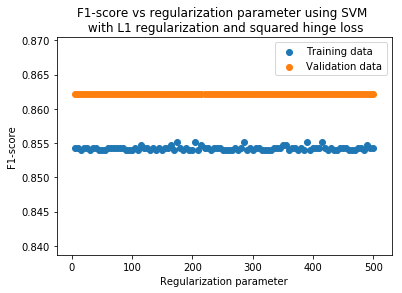

In [47]:
plt.figure()
plt.scatter(C_vals, SVM_f1_train_l1_squared, label = 'Training data')
plt.scatter(C_vals, SVM_f1_validation_l1_squared, label = 'Validation data')
plt.legend()
plt.title('F1-score vs regularization parameter using SVM \n with L1 regularization and squared hinge loss')
plt.xlabel('Regularization parameter')
plt.ylabel('F1-score')
plt.show()

We see that the choice of C has essentially no impact on the f1-score. Changing C to something much larger also seems to have almost no impact:

In [48]:
SVM_f1(penalty='l1', loss='squared_hinge', C = 1)

(0.8539435248296007, 0.8621621621621621)

In [49]:
SVM_f1(penalty='l1', loss='squared_hinge', C = 10)

(0.8543594739405748, 0.8621621621621621)

In [50]:
SVM_f1(penalty='l1', loss='squared_hinge', C = 1000)

(0.8556097560975611, 0.8621621621621621)

In [51]:
SVM_f1(penalty='l1', loss='squared_hinge', C = 10000)

(0.8543594739405748, 0.8621621621621621)

We now look at Ridge regularization:

In [87]:
SVM_f1_train_l2_squared = np.empty(100) #f1-scores for training data
SVM_f1_validation_l2_squared = np.empty(100) #f1-scores for validation data

for i in range(100):
    C = C_vals[i]
    SVM_f1_train_l2_squared[i], SVM_f1_validation_l2_squared[i] = SVM_f1(penalty='l2', loss='squared_hinge', C=C) 

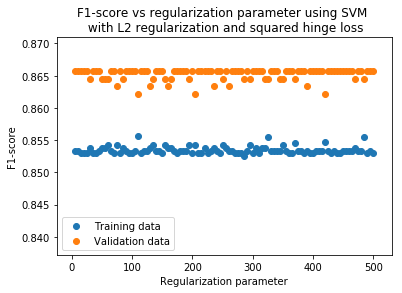

In [53]:
plt.figure()
plt.scatter(C_vals, SVM_f1_train_l2_squared, label = 'Training data')
plt.scatter(C_vals, SVM_f1_validation_l2_squared, label = 'Validation data')
plt.legend()
plt.title('F1-score vs regularization parameter using SVM \n with L2 regularization and squared hinge loss')
plt.xlabel('Regularization parameter')
plt.ylabel('F1-score')
plt.show()

Also in this case, the regularization parameter is not important for the f1-score.

In [54]:
SVM_f1(penalty='l2', loss='squared_hinge', C = 1)

(0.8558866634098681, 0.8633288227334235)

In [55]:
SVM_f1(penalty='l2', loss='squared_hinge', C = 100)

(0.8529698149951314, 0.8656716417910448)

In [56]:
SVM_f1(penalty='l2', loss='squared_hinge', C = 1000)

(0.8542174549000487, 0.8644986449864499)

In [57]:
SVM_f1(penalty='l2', loss='squared_hinge', C = 10000)

(0.8533852898197759, 0.8656716417910448)

It seems that the f1-score is almost completely independent of the regularization parameter, but that it depends on the regularization method - Ridge regularization seems to give slightly better scores than Lasso regularization.

We now compare the loss functions squared hinge and hinge using Ridge regularization.

In [86]:
SVM_f1_train_l2_hinge = np.empty(100) #f1-scores for training data using l2 regularization and hinge loss
SVM_f1_validation_l2_hinge = np.empty(100) #validation data

for i in range(100):
    C = C_vals[i]
    SVM_f1_train_l2_hinge[i], SVM_f1_validation_l2_hinge[i] = SVM_f1(penalty='l2', loss='hinge', C=C) 

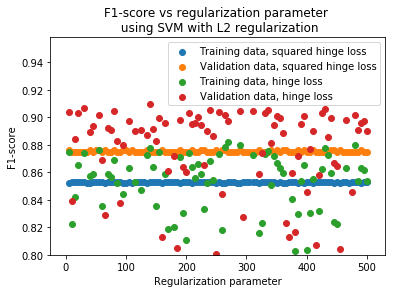

In [88]:
plt.figure()
plt.scatter(C_vals, SVM_f1_train_l2_squared, label = 'Training data, squared hinge loss')
plt.scatter(C_vals, SVM_f1_validation_l2_squared, label = 'Validation data, squared hinge loss')
plt.scatter(C_vals, SVM_f1_train_l2_hinge, label = 'Training data, hinge loss')
plt.scatter(C_vals, SVM_f1_validation_l2_hinge, label = 'Validation data, hinge loss')
plt.legend(loc = 0, bbox_to_anchor = (1,1))
plt.title('F1-score vs regularization parameter \n using SVM with L2 regularization')
plt.xlabel('Regularization parameter')
plt.ylabel('F1-score')
plt.ylim(0.8)
plt.show()

We see that the choice of loss function has a big effect on the f1-scores. Using hinge loss, the regularization parameter suddenly becomes important again, with small changes in the regularization parameter giving large variations in f1-scores.

The choice of hyperparameters that maximize the f1-scores clearly includes using L2 regularization and a hinge loss function. For choosing the value of the regularization parameter, we in principle need to consider two things: what choice maximizes the f1-score of the validation data and what choice minimizes the difference between the f1-scores of the test data and the validation data?

The second question is important to ask to avoid overfitting. However, in this case we see that the f1-score on the validation set in general is higher than the f1-score on the training set. Thus, we do not have to worry about overfitting as that would lead to the model performing much better on the training data than on the validation data. Hence, we will pick the value of the regularization paramter that maximizes the f1-score on the validation set.

In [89]:
parameter_index = np.argmax(SVM_f1_validation_l2_hinge) #find the index that maximizes the f1-score using l2 and hinge
C_best = C_vals[parameter_index] #the value of C that maximizes the f1-score

print('The maximum f1-score is', round(SVM_f1_validation_l2_hinge[parameter_index],3), 'which is achieved for C =', C_best, '.')

The maximum f1-score is 0.909 which is achieved for C = 140 .


We know test the best model on the test data set:

In [90]:
svm_clf = LinearSVC(penalty='l2', loss='hinge', C=140, class_weight='balanced', dual=True) #set hyperparameters
svm_clf.fit(X_train, y_train) #fit the model to the training data
test_predict = svm_clf.predict(X_test) #the predicted classes for the test data
f1_score(y_test, test_predict)

0.8144499178981939

To summarize:

In deliverable 2, the parameters were set like this:

* penalty = 'l2' (ridge regularization)
* loss = 'squared_hinge' (a squared hinge loss function)
* C = 100

These parameters gave us the following f1-scores:
* Training: 0.879
* Validation: 0.889
* Test: 0.865

Our testing lead us to the following best choice of parameters:

* penalty = 'l2'
* loss = 'hinge'
* C = 230